In [2]:
import cvrpy
import numpy as np
import tikzplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

# Analysis of the real datasets

In [3]:


def get_metrics(dataset_name, are_weights=False):
    rankings = np.loadtxt(f'datasets/{dataset_name}_rankings.csv', delimiter=',')
    if are_weights:
        weights = np.loadtxt(f'datasets/{dataset_name}_weights.csv', delimiter=',')
    else:
        weights = np.ones(rankings.shape[0])

    m_candidates = rankings.shape[1]

    metrics = []
    for i in range(m_candidates):
        for j in range(i+1,m_candidates):
            alpha = cvrpy.getAlpha(rankings, i, j,weights)
            beta = cvrpy.getBeta(rankings, i, j,weights)
            gamma = cvrpy.getGamma(rankings, i, j,weights)
            imbalance = 1-cvrpy.getImbalance(rankings, i, j,weights)
            metrics.append([alpha, beta, gamma, imbalance])

    metrics = np.array(metrics)
    return metrics

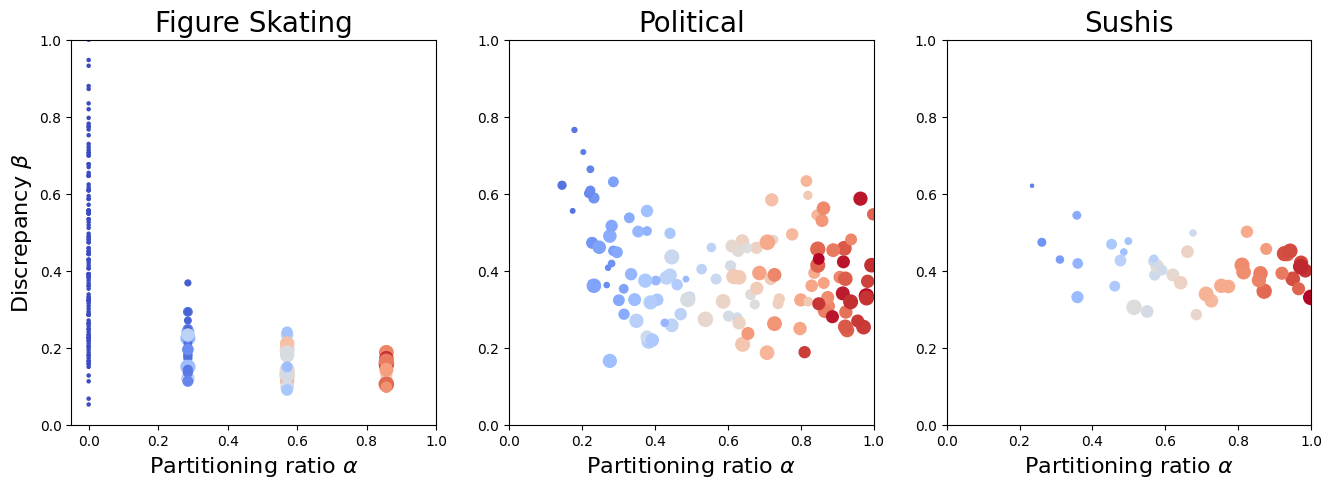

In [7]:
phi_list = [0.1,0.3,0.6]
n_centers_list = [1,2]

np.random.seed(42)
fig, axs = plt.subplots(1, 3, figsize=(16,5))

metrics = np.concatenate([get_metrics('french_presidential_2017', are_weights=True)
                          , get_metrics('french_presidential_2022', are_weights=False)])

cs = axs[1].scatter(metrics[:,0], metrics[:,1], c=metrics[:,3], vmin=0, vmax=1,
            s=(metrics[:,2]-min(metrics[:,2]))/(max(metrics[:,2])-min(metrics[:,2]))*100+5, cmap='coolwarm')
axs[1].set_title(r"Political", fontsize=20)
axs[1].set_xlabel(r"Partitioning ratio $\alpha$", fontsize=16)
axs[1].set_xlim(0,1)
axs[1].set_ylim(0,1)

metrics = get_metrics('sushis')

cs = axs[2].scatter(metrics[:,0], metrics[:,1], c=metrics[:,3], vmin=0, vmax=1,
            s=(metrics[:,2]-min(metrics[:,2]))/(max(metrics[:,2])-min(metrics[:,2]))*100+5, cmap='coolwarm')
axs[2].set_title(r"Sushis", fontsize=20)
axs[2].set_xlabel(r"Partitioning ratio $\alpha$", fontsize=16)
axs[2].set_xlim(0,1)
axs[2].set_ylim(0,1)

metrics = get_metrics('skate_24')

cs = axs[0].scatter(metrics[:,0], metrics[:,1], c=metrics[:,3], vmin=0, vmax=1,
            s=(metrics[:,2]-min(metrics[:,2]))/(max(metrics[:,2])-min(metrics[:,2]))*100+5, cmap='coolwarm')
axs[0].set_title(r"Figure Skating", fontsize=20)
axs[0].set_xlabel(r"Partitioning ratio $\alpha$", fontsize=16)
axs[0].set_ylabel(r"Discrepancy $\beta$", fontsize=16)
axs[0].set_xlim(-0.05,1)
axs[0].set_ylim(0,1)


# cbar = plt.colorbar(cs, ax=axs.ravel().tolist())
# cbar.ax.tick_params(labelsize=16)
# cbar.set_label(label=r"Global Imbalance $\gamma'$", size=16)
plt.savefig("figures/real_datasets.png", dpi=300)
plt.show()